# FrostMart UK Businsess insights and strategic reccommedations

## Objective
You are tasked with analysing weekly sales, product details, and store information
datasets to extract business insights and generate strategic recommendations. The goal is
to transform raw data into actionable intelligence for decision-making.

### imports

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [2]:
product_details = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\product_details.csv")
store_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\psxea2\Desktop\Amdari files\Retail-Demand-and-Waste-Prediction\raw data\weekly_sales.csv")

In [3]:
product_details.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


In [4]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


In [5]:
supplier_info.head()

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306


In [6]:
weather_data.head()

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1


In [7]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


In [8]:
weekly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB


### initial exploration

In [9]:
def initial_eda(data, name):
  print('='*60)
  print(f'{name} dataset information')
  print(data.info())
  print('='*60)
  print(f'{name} dataset shape')
  print(data.shape)
  print('='*60)
  print(f'{name} dataset description')
  print(data.describe())
  print('='*60)
  print(f'{name} dataset columns')
  print(data.columns)
  print('='*60)
  print(f'{name} dataset missing values')
  print(data.isna().sum())
  print('='*60)
  print(f'{name} dataset duplicate values')
  print(data.duplicated().sum())
  print('='*60)


In [10]:
initial_eda(product_details, 'product_details')

product_details dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
product_details dataset shape
(48, 5)
product_details dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356

In [11]:
initial_eda(store_info, 'store_info')

store_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 612.0+ bytes
None
store_info dataset shape
(15, 4)
store_info dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.5000

In [12]:
initial_eda(supplier_info, 'supplier_info')

supplier_info dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 452.0+ bytes
None
supplier_info dataset shape
(10, 4)
supplier_info dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.0000

In [13]:
initial_eda(weather_data, 'weather_data')

weather_data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
weather_data dataset shape
(364, 5)
weather_data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max         

In [14]:
initial_eda(weekly_sales, 'weekly_sales')

weekly_sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
weekly_sales dataset shape
(37440, 8)
weekly_sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872

### Exploratory Data Analysis:

---

Having done initial exploration of the data to check its tidiness in terms of structure, descriptive statistics of the attributes and duplicates, this section moves on to exploring the data in more detail to extract business insights and arrive at strategic recommendations. Specifically, the analyses includes investigating overall business performance, performance of the different categories of products , performance at the regional level, pricing strategy, promotion effectiveness, marketing spend effectiveness,roduct performance, seasonal trends, shelf-life impact and analysis of store efficiency.

#### Overall Business performance

---
This section investigate the performance of the business in terms of total units sold, total wastage and the wastage rate.  The wastage rate tells us what percentage of the total units handled were wasted.


In [28]:
total_units_sold = weekly_sales['Units_Sold'].sum()
print(f"Total Sales Volume,ie. total Units Sold is {total_units_sold}")  # total units sold

total_wastage = weekly_sales['Wastage_Units'].sum()
print(f"Total Wastage is {total_wastage}")  # total wastage


wastage_rate = (total_wastage / total_units_sold)*100
print(f"Total wastage rate is {wastage_rate:.2f}%")

total_spent_on_marketing = weekly_sales['Marketing_Spend'].sum()
print(f"Total amount spent on marketing is ${total_spent_on_marketing:.2f}")  # total marketing spend

total_revenue = (weekly_sales['Price'].sum() * weekly_sales['Units_Sold'].sum() - weekly_sales['Marketing_Spend'].sum())
print(f"Total Revenue generated is £{total_revenue:.2f}")  # total revenue

total_lost_due_to_wastage = (weekly_sales['Wastage_Units'] * weekly_sales['Price']).sum()
print(f"Total amount lost due to wastage is £{total_lost_due_to_wastage:.2f}")  # total lost due to wastage


Total Sales Volume,ie. total Units Sold is 61482249
Total Wastage is 4786490
Total wastage rate is 7.79%
Total amount spent on marketing is $15371036.75
Total Revenue generated is £9580665119034.85
Total amount lost due to wastage is £15660800.74


#### Product Category Performance

---
This section investigates which product category has the highest sales, which category has the highest wastage rate and the category with highest average price. We summarize category-level insights and risks

In [16]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


In [17]:
# merge relevant data to extract the required information: weekly sales data and product details
pdt_info = product_details.merge(weekly_sales, on='Product_ID')
pdt_info.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,718,2.46
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,282,3.76
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,455,3.81
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,422,1.09
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,475,2.72


In [18]:
# calculate sales for each product category
pdt_category_sales_vol =pdt_info.groupby('Product_Category')['Units_Sold'].sum().sort_values(ascending=False).reset_index()

In [19]:
pdt_category_sales_vol

,Product_Category,Units_Sold
0,Dairy,24514345
1,Bakery,17802002
2,Beverages,12221362
3,Meat,6944540


In [ ]:
#calculate wastage rate per category
pdt_cat_sales_waste = pdt_info.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum'
    
})


pdt_category_wastage_rate =  (pdt_cat_sales_waste['Wastage_Units'] / pdt_cat_sales_waste['Units_Sold'] * 100).sort_values(ascending=False).reset_index().rename(columns={0: 'Wastage_Rate'})

In [21]:
pdt_category_wastage_rate

,Product_Category,Wastage_Rate
0,Bakery,14.729124
1,Meat,9.487137
2,Dairy,4.913772
3,Beverages,2.462852


In [22]:
# calculate average waste per product category
pdt_category_avg_price = pdt_info.groupby('Product_Category')['Price'].mean().sort_values(ascending=False).reset_index()

In [23]:
#CALCUALTE  SALES REVENUE FOR EACH PRODCUT CATEOGRY
pdt_info['Sales_Revenue(£)']=pdt_info['Units_Sold']*pdt_info['Price']
pdt_category_sales_revenue = pdt_info.groupby('Product_Category')['Sales_Revenue(£)'].sum().sort_values(ascending=False).reset_index()

In [43]:
#pdt_info



In [ ]:
best_performing_product_by_sales = pdt_info.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Price': 'sum',
    'Marketing_Spend': 'mean'
    
})


In [40]:

print(f"The product that sells the most units is {best_performing_product_by_sales['Units_Sold'].idxmax()}")
print(f"With the total number of units sold : {best_performing_product_by_sales['Units_Sold'].max()}")
print(f"With the total of {best_performing_product_by_sales['Units_Sold'].max() * best_performing_product_by_sales['Price'].max():,} generated in revenue")

The product that sells the most units is Dairy
With the total number of units sold : 24514345
With the total of 1,669,124,387,482.7002 generated in revenue


In [41]:
best_performing_product_by_sales

,Units_Sold,Wastage_Units,Price,Marketing_Spend
Product_Category,,,,
Bakery,17802002,2622079,22582.62,548.040509
Beverages,12221362,300994,38680.60,545.328623
Dairy,24514345,1204579,26477.52,274.447224
Meat,6944540,658838,68087.66,274.388425


In [44]:
print(f"The product with the highest wastage units is {best_performing_product_by_sales['Wastage_Units'].idxmax()}")
print(f"With the maximum number of units wasted : {best_performing_product_by_sales['Wastage_Units'].max()}")


The product with the highest wastage units is Bakery
With the maximum number of units wasted : 2622079


In [45]:
print(f"The product with the highest price is {best_performing_product_by_sales['Price'].idxmax()}")

The product with the highest price is Meat


In [29]:
pdt_category_sales_revenue

,Product_Category,Sales_Revenue(£)
0,Dairy,69004913.73
1,Beverages,50322427.06
2,Meat,50004387.20
3,Bakery,42702397.77


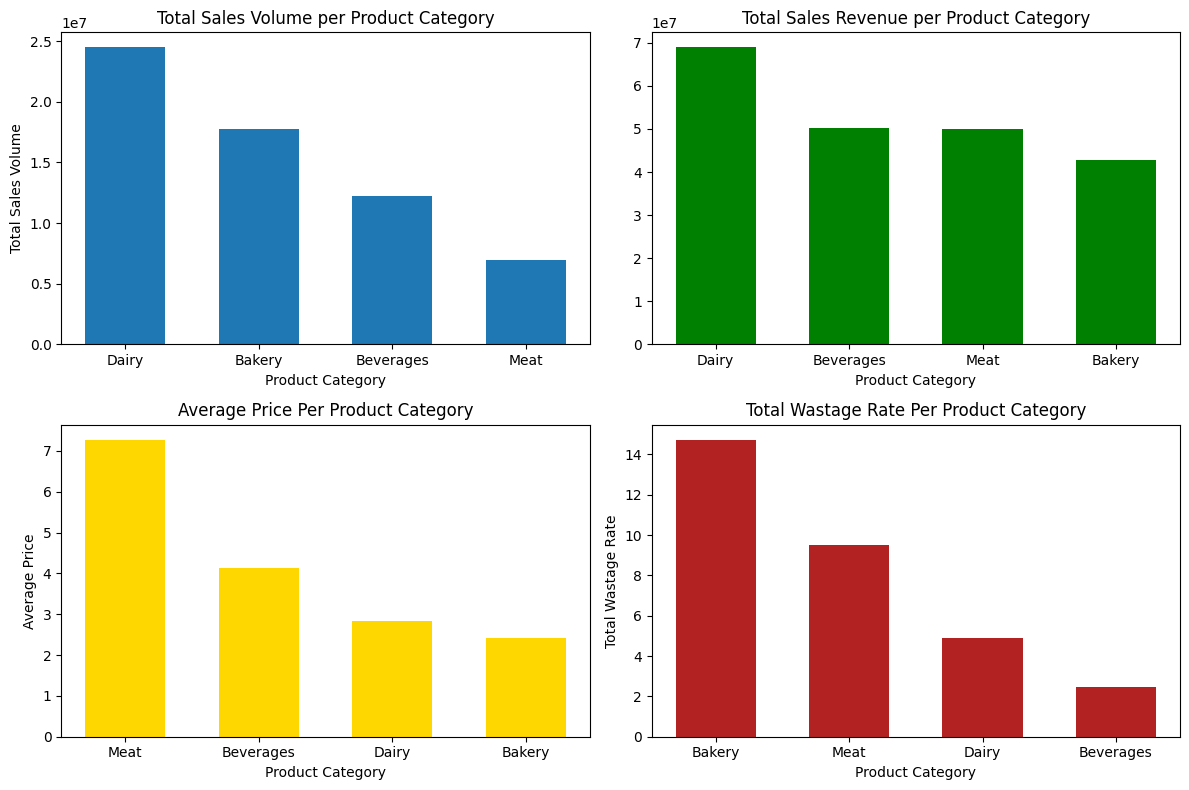

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(12, 8))

#Plot the Total Sales Volume per Product Category
plt.subplot(2,2,1)
plt.bar(pdt_category_sales_vol['Product_Category'],
        pdt_category_sales_vol['Units_Sold'],
        #color='Blue',
        width=0.6)
plt.title('Total Sales Volume per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')


#plot total sales revenue
plt.subplot(2,2,2)
plt.bar(pdt_category_sales_revenue['Product_Category'],
        pdt_category_sales_revenue['Sales_Revenue(£)'],
        color='Green',
        width=0.6)
plt.title('Total Sales Revenue per Product Category')
plt.xlabel('Product Category')
plt.ylabel


#plot average price per product catergory
plt.subplot(2,2,3)
plt.bar(pdt_category_avg_price['Product_Category'],
        pdt_category_avg_price['Price'],
        color='gold',
        width=0.6)
plt.title('Average Price Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')


#Plot total wastage rate per product categgory
plt.subplot(2,2,4)
plt.bar(pdt_category_wastage_rate['Product_Category'],
        pdt_category_wastage_rate['Wastage_Rate'],
        color='firebrick',
        width=0.6)
plt.title('Total Wastage Rate Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Wastage Rate')

plt.tight_layout()
plt.show()

plt.savefig("category_performance_dashboard.png", dpi=300, bbox_inches='tight')

In [31]:
#plt.savefig("category_performance_dashboard.png", dpi=300, bbox_inches='tight')

#### Regional Performance

In [47]:
regional_sales_info = weekly_sales.merge(store_info, on='Store_ID')

regional_sales_performance = regional_sales_info.groupby('Region').agg({
    'Units_Sold': 'sum',
    'Wastage_Units': 'sum',
    'Price': 'sum',
    'Marketing_Spend': 'mean',
    'Store_Size': 'mean'
})


The Region with the highest sales volume is London with the sales volume of 20648649 units


<BarContainer object of 6 artists>

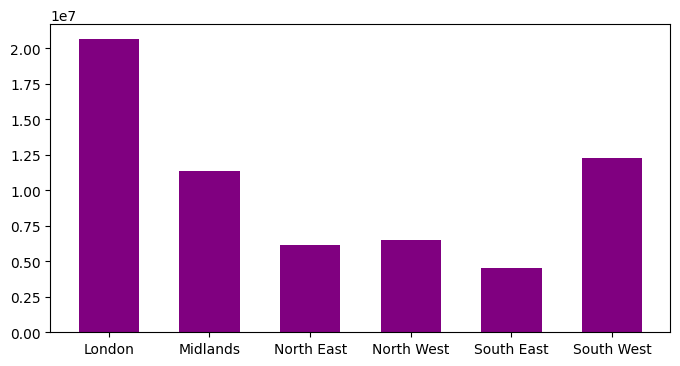

In [53]:

print(f"The Region with the highest sales volume is {regional_sales_performance['Units_Sold'].idxmax()} with the sales volume of {regional_sales_performance['Units_Sold'].max()} units")

#plot regional sales performance by sales volume
plt.figure(figsize=(8,4))
plt.bar(regional_sales_performance.index,
        regional_sales_performance['Units_Sold'],
        color='purple',
        width=0.6)

The Region with the highest wastage rate is London with the total wastage of 1613202 units


<BarContainer object of 6 artists>

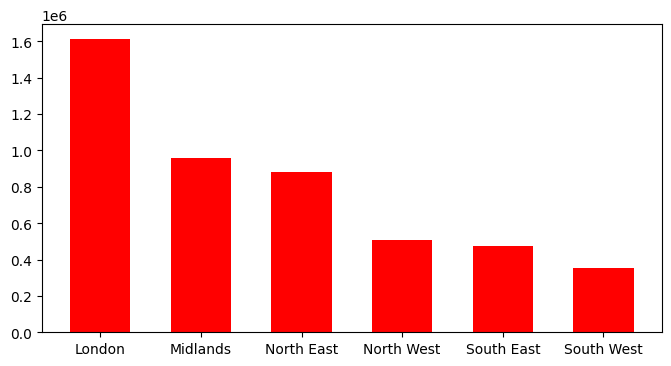

In [56]:
print(f"The Region with the highest wastage rate is {regional_sales_performance['Wastage_Units'].idxmax()} with the total wastage of {regional_sales_performance['Wastage_Units'].max()} units")


#plot the wastage rate by region
plt.figure(figsize=(8,4))
plt.bar(regional_sales_performance.index,
        regional_sales_performance['Wastage_Units'].sort_values(ascending=False),
        color='red',
        width=0.6)

Most Efficient region in terms of store size to sales is South West with the store size to sales ratio of 0.0003
/n
The store region with least wastage rate is South East with the total wastage of 354789 units


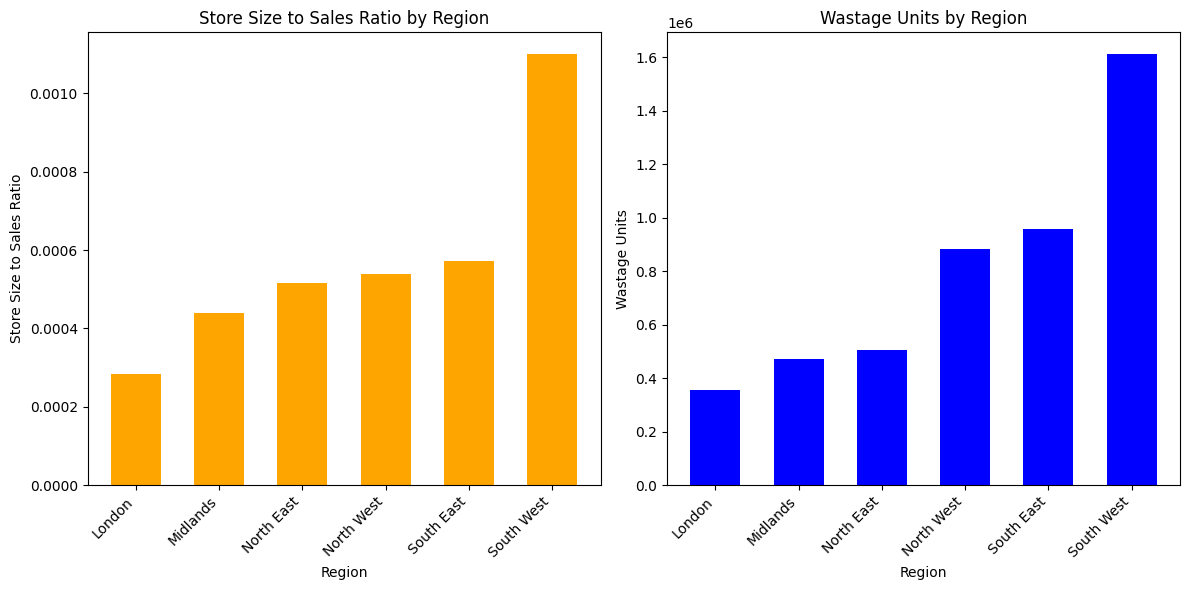

In [62]:

regional_sales_performance['Store_size_by_sales'] = regional_sales_performance['Store_Size']/regional_sales_performance['Units_Sold']


print(f"Most Efficient region in terms of store size to sales is {regional_sales_performance['Store_size_by_sales'].idxmin()} with the store size to sales ratio of {regional_sales_performance['Store_size_by_sales'].min():.4f}")

print("/n")
print(f"The store region with least wastage rate is {regional_sales_performance['Wastage_Units'].idxmin()} with the total wastage of {regional_sales_performance['Wastage_Units'].min()} units")


#plot store size to sales ratio by region and wastage rate on 2 subplots: tilt the values of x-axis for better visibility
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(regional_sales_performance.index,
        regional_sales_performance['Store_size_by_sales'].sort_values(ascending=True),
        color='orange',
        width=0.6)
plt.title('Store Size to Sales Ratio by Region')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to right
plt.ylabel('Store Size to Sales Ratio')


# regional wastage units
plt.subplot(1,2,2)
plt.bar(regional_sales_performance.index,
        regional_sales_performance['Wastage_Units'].sort_values(ascending=True),
        color='blue',
        width=0.6)
plt.title('Wastage Units by Region')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Wastage Units')


plt.tight_layout()
plt.show()

#### Pricing Strategy Analysis

avgerage price of products is $4.16
There is 26726 low cost products priced below $5, which is 71.4% of total products.
There is 8964 medium products priced between $5 and $10, which is 23.9% of total products.
There is 1750 expensive products priced above $10, which is 4.7% of total products.


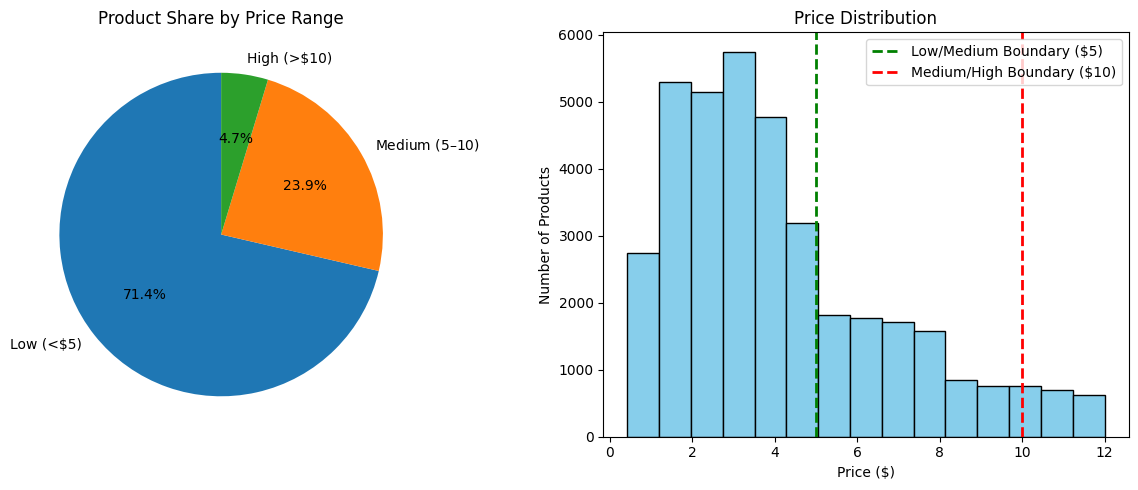

In [84]:
average_price = weekly_sales['Price'].mean()
print(f"avgerage price of products is ${average_price:.2f}")


price_ranges = [
    (weekly_sales['Price'] < 5).sum(),
    ((weekly_sales['Price'] >= 5) & (weekly_sales['Price'] < 10)).sum(),
    (weekly_sales['Price'] >= 10).sum()
]

price_ranges_percent = [f"{(count / len(weekly_sales) * 100):.1f}" for count in price_ranges]

print(f"There is {price_ranges[0]} low cost products priced below $5, which is {price_ranges_percent[0]}% of total products.")
print(f"There is {price_ranges[1]} medium products priced between $5 and $10, which is {price_ranges_percent[1]}% of total products.")
print(f"There is {price_ranges[2]} expensive products priced above $10, which is {price_ranges_percent[2]}% of total products.")




labels = ['Low (<$5)', 'Medium ($5–$10)', 'High (>$10)']
colors = ['green', 'gold', 'red']

plt.figure(figsize=(12,5))
# --- Left: Pie chart ---
plt.subplot(1,2,1)
plt.pie(price_ranges, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Product Share by Price Range')

# --- Right: Histogram ---
plt.subplot(1,2,2)
plt.hist(weekly_sales['Price'], bins=15, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')


# Add vertical range lines (insert *after* plotting the histogram)
plt.axvline(x=5, color='green', linestyle='--', linewidth=2, label='Low/Medium Boundary ($5)')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Medium/High Boundary ($10)')

plt.legend()

plt.tight_layout()
plt.show()

#### Promotion Effectiveness  

Analyze the relationship between discount levels and sales.
Identify which discount percentage drives the highest sales.
Compare sales at the best discount vs. no discount, and calculate the
percentage sales lift.

Most effective discount: 0%
Sales increase vs. no discount: 0.0%
Total units sold at 0% discount: 45,269,818
Wastage rate at 0% discount: 7.5%


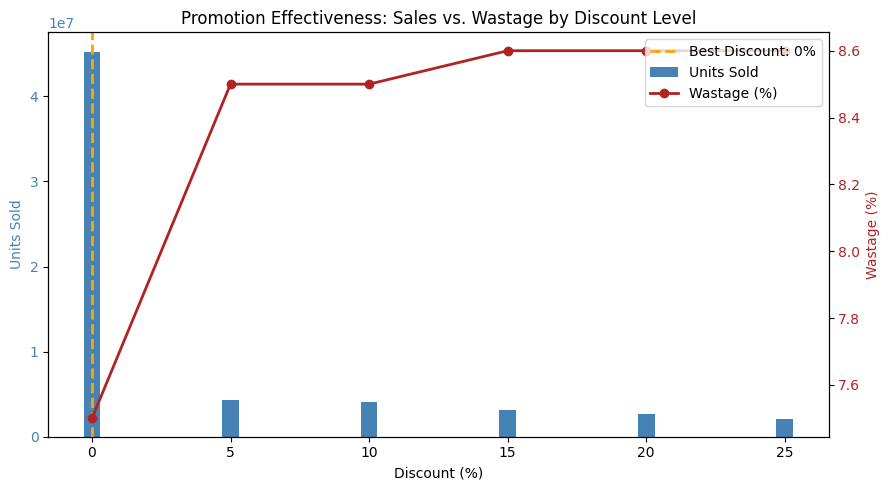

In [89]:
import matplotlib.pyplot as plt

# --- 1️ Aggregate by discount level ---
discount_performance = (
    weekly_sales.groupby('Discount_Percent')
    .agg({'Units_Sold': 'sum', 'Wastage_Units': 'sum'})
    .reset_index()
    .sort_values('Discount_Percent')
)

# --- 2️ Calculate wastage percentage ---
discount_performance['Wastage_%'] = (
    discount_performance['Wastage_Units'] / discount_performance['Units_Sold'] * 100
).round(1)

# --- 3️ Identify best discount and baseline (no discount) ---
best_discount_row = discount_performance.loc[discount_performance['Units_Sold'].idxmax()]
best_discount = best_discount_row['Discount_Percent']
best_discount_sales = best_discount_row['Units_Sold']

if 0 in discount_performance['Discount_Percent'].values:
    no_discount_sales = discount_performance.loc[
        discount_performance['Discount_Percent'] == 0, 'Units_Sold'
    ].values[0]
else:
    no_discount_sales = discount_performance['Units_Sold'].min()

sales_increase_pct = ((best_discount_sales - no_discount_sales) / no_discount_sales) * 100

# --- 4️ Key insights printout ---
print(f"Most effective discount: {best_discount:.0f}%")
print(f"Sales increase vs. no discount: {sales_increase_pct:.1f}%")
print(f"Total units sold at {best_discount:.0f}% discount: {best_discount_sales:,.0f}")
print(f"Wastage rate at {best_discount:.0f}% discount: {best_discount_row['Wastage_%']:.1f}%")

# --- 5️ Dual-axis plot: Sales vs Wastage ---
fig, ax1 = plt.subplots(figsize=(9,5))

# Plot sales (bar)
bars = ax1.bar(
    discount_performance['Discount_Percent'],
    discount_performance['Units_Sold'],
    color='steelblue', width=0.6, label='Units Sold'
)
ax1.set_xlabel('Discount (%)')
ax1.set_ylabel('Units Sold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Highlight best discount line
ax1.axvline(best_discount, color='orange', linestyle='--', linewidth=2, label=f'Best Discount: {best_discount:.0f}%')

# Plot wastage % (line)
ax2 = ax1.twinx()
ax2.plot(
    discount_performance['Discount_Percent'],
    discount_performance['Wastage_%'],
    color='firebrick', marker='o', linewidth=2, label='Wastage (%)'
)
ax2.set_ylabel('Wastage (%)', color='firebrick')
ax2.tick_params(axis='y', labelcolor='firebrick')

# Add title and legend
plt.title('Promotion Effectiveness: Sales vs. Wastage by Discount Level')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

#### Marketing Spend Effectiveness

The correlation between marketing spend and units sold is 0.04
Average marketing spend per unit sold is $0.25


C:\Users\psxea2\AppData\Local\Temp\ipykernel_17124\1890917381.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_sales.groupby('Spend_Range')['Units_Sold']


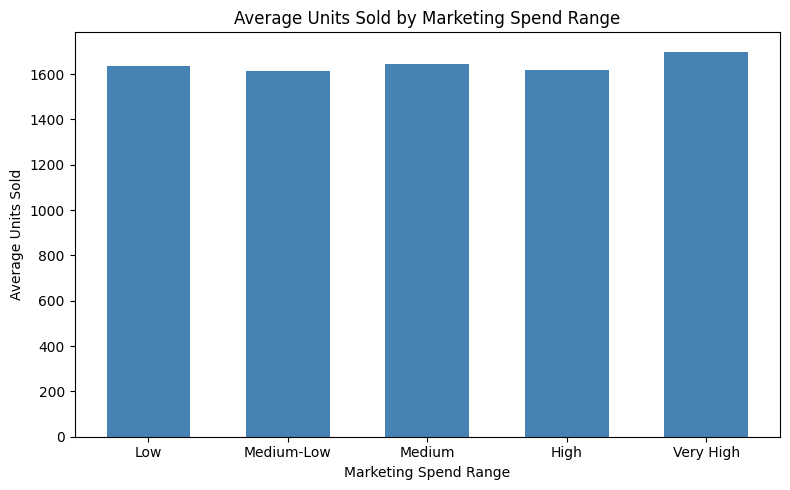

In [126]:

# --- 1 Correlation and efficiency metrics ---
marketing_correlation =  weekly_sales[['Marketing_Spend', 'Units_Sold']].corr().iloc[0,1]
average_marketing_per_units_sold = weekly_sales['Marketing_Spend'].sum() / weekly_sales['Units_Sold'].sum()


print(f"The correlation between marketing spend and units sold is {marketing_correlation:.2f}")
print(f"Average marketing spend per unit sold is ${average_marketing_per_units_sold:.2f}")

# 1️  Bin marketing spend into ranges
weekly_sales['Spend_Range'] = pd.qcut(
    weekly_sales['Marketing_Spend'],
    q=5,  # 5 groups
    labels=['Low','Medium-Low','Medium','High','Very High']
)

# 2️  Compute average sales for each range
marketing_bins = (
    weekly_sales.groupby('Spend_Range')['Units_Sold']
    .mean()
    .reset_index()
    .rename(columns={'Units_Sold':'Avg_Units_Sold'})
)

# 3️  Bar chart
plt.figure(figsize=(8,5))
plt.bar(marketing_bins['Spend_Range'], marketing_bins['Avg_Units_Sold'], color='steelblue', width=0.6)
plt.title('Average Units Sold by Marketing Spend Range')
plt.xlabel('Marketing Spend Range')
plt.ylabel('Average Units Sold')
plt.tight_layout()
plt.show()

#### Product Performance

Top 5 Best-Selling Products (Units Sold):
    Product_ID  Units_Sold     Revenue
31        1031     2093430  5890777.83
30        1030     2070145  5801528.28
33        1033     2053001  5763458.14
29        1029     2049192  5800579.49
34        1034     2046517  5771125.47
Top 5 Revenue-Generating Products:
    Product_ID     Revenue  Units_Sold
31        1031  5890777.83     2093430
24        1024  5816987.20     2044322
27        1027  5813609.82     2023271
30        1030  5801528.28     2070145
29        1029  5800579.49     2049192
Top 5 Highest-Wastage Products (with >1,000 Units Sold):
    Product_ID  Units_Sold  Wastage_Units  Wastage_Rate
1         1001     1535142         229905         14.98
2         1002     1527983         228819         14.98
6         1006     1496069         224051         14.98
9         1009     1518958         227480         14.98
11        1011     1534966         229869         14.98


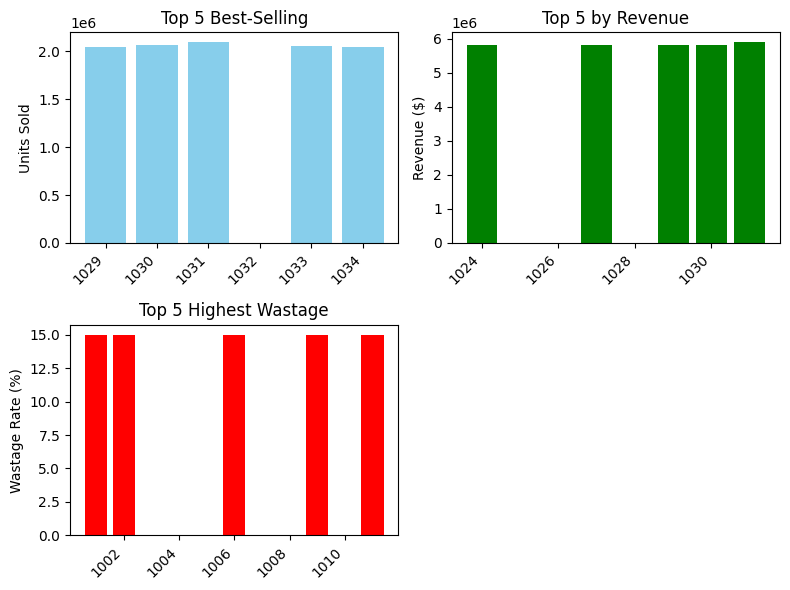

In [101]:
# --- 1️ Aggregate key metrics per product ---
product_performance = (
    pdt_info.groupby('Product_ID')
    .agg({
        'Units_Sold': 'sum',
        'Wastage_Units': 'sum',
        'Price': 'mean',
        'Shelf_Life_Days': 'first'
    })
    .reset_index()
)

# --- 2️ Derived metrics ---
product_performance['Wastage_Rate'] = (
    product_performance['Wastage_Units'] / product_performance['Units_Sold'] * 100
).round(2)
product_performance['Revenue'] = (
    product_performance['Units_Sold'] * product_performance['Price']
).round(2)

# --- 3️ Top 5 lists ---
top5_best_selling = product_performance.nlargest(5, 'Units_Sold')
top5_revenue = product_performance.nlargest(5, 'Revenue')
top5_wastage = (
    product_performance[product_performance['Units_Sold'] > 1000]
    .nlargest(5, 'Wastage_Rate')
)

# --- 4️ Print summaries ---
print("Top 5 Best-Selling Products (Units Sold):")
print(top5_best_selling[['Product_ID', 'Units_Sold', 'Revenue']])
print("="*50)

print("Top 5 Revenue-Generating Products:")
print(top5_revenue[['Product_ID', 'Revenue', 'Units_Sold']])
print("="*50)

print("Top 5 Highest-Wastage Products (with >1,000 Units Sold):")
print(top5_wastage[['Product_ID', 'Units_Sold', 'Wastage_Units', 'Wastage_Rate']])
print("="*50)





# --- 5️ Optional: Visual comparison ---
plt.figure(figsize=(8,6))

# a) Best selling
plt.subplot(2,2,1)
plt.bar(top5_best_selling['Product_ID'], top5_best_selling['Units_Sold'], color='skyblue')
plt.title('Top 5 Best-Selling')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')

# b) Revenue
plt.subplot(2,2,2)
plt.bar(top5_revenue['Product_ID'], top5_revenue['Revenue'], color='green')
plt.title('Top 5 by Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')

# c) Wastage rate
plt.subplot(2,2,3)
plt.bar(top5_wastage['Product_ID'], top5_wastage['Wastage_Rate'], color='red')
plt.title('Top 5 Highest Wastage')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [108]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Date,Month
0,2024-W01,1000,500,4853,670.37,0,718,2.46,2024-01-01,January
1,2024-W01,1001,500,4274,1089.62,0,641,1.27,2024-01-01,January
2,2024-W01,1002,500,4215,1004.99,10,632,2.74,2024-01-01,January
3,2024-W01,1003,500,5768,859.45,20,853,1.82,2024-01-01,January
4,2024-W01,1004,500,3403,576.70,0,503,3.46,2024-01-01,January


#### Seasonal Trends

 Best sales month: 1
 Highest wastage month: 1
 Most efficient marketing month: 2


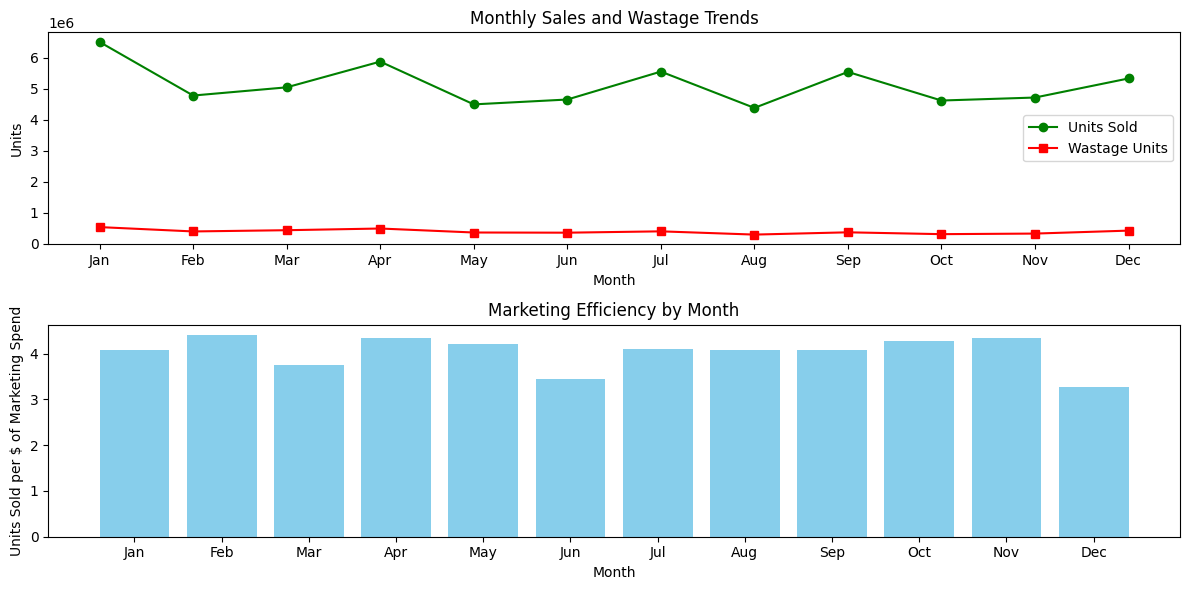

In [113]:
# --- 1️ Convert ISO week (e.g. '2024-W01') to actual date ---
weekly_sales['Date'] = pd.to_datetime(weekly_sales['Week_Number'] + '-1', format='%G-W%V-%u')

# --- 2️  Extract numeric month from the date ---
weekly_sales['Month'] = weekly_sales['Date'].dt.month

# --- 3️ Aggregate performance by month ---
monthly_performance = (
    weekly_sales.groupby('Month')
    .agg({
        'Units_Sold': 'sum',
        'Wastage_Units': 'sum',
        'Marketing_Spend': 'sum'
    })
    .reset_index()
)

# --- 4️ Compute marketing efficiency ---
monthly_performance['Sales_per_Marketing_$'] = (
    monthly_performance['Units_Sold'] / monthly_performance['Marketing_Spend']
).round(2)

# --- 5️ Identify key months ---
best_sales_month = int(monthly_performance.loc[monthly_performance['Units_Sold'].idxmax(), 'Month'])
highest_wastage_month = int(monthly_performance.loc[monthly_performance['Wastage_Units'].idxmax(), 'Month'])
most_efficient_marketing_month = int(monthly_performance.loc[monthly_performance['Sales_per_Marketing_$'].idxmax(), 'Month'])

print(f" Best sales month: {best_sales_month}")
print(f" Highest wastage month: {highest_wastage_month}")
print(f" Most efficient marketing month: {most_efficient_marketing_month}")

# --- 6️ Visualization ---
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(12,6))

# (a) Sales & Wastage Trends
plt.subplot(2,1,1)
plt.plot(monthly_performance['Month'], monthly_performance['Units_Sold'], marker='o', color='green', label='Units Sold')
plt.plot(monthly_performance['Month'], monthly_performance['Wastage_Units'], marker='s', color='red', label='Wastage Units')
plt.title('Monthly Sales and Wastage Trends')
plt.xlabel('Month')
plt.ylabel('Units')
plt.xticks(ticks=range(1,13), labels=month_labels)
plt.legend()

# (b) Marketing Efficiency
plt.subplot(2,1,2)
plt.bar(monthly_performance['Month'], monthly_performance['Sales_per_Marketing_$'], color='skyblue')
plt.title('Marketing Efficiency by Month')
plt.xlabel('Month')
plt.ylabel('Units Sold per $ of Marketing Spend')
plt.xticks(ticks=range(1,13), labels=month_labels)

plt.tight_layout()
plt.show()

#### Shelf Life Analysis  

 Category with shortest shelf life: Bakery
 Category with longest shelf life: Beverages
 Category with highest wastage (linked to shelf life): Bakery
 Correlation between shelf life and wastage rate: -0.70


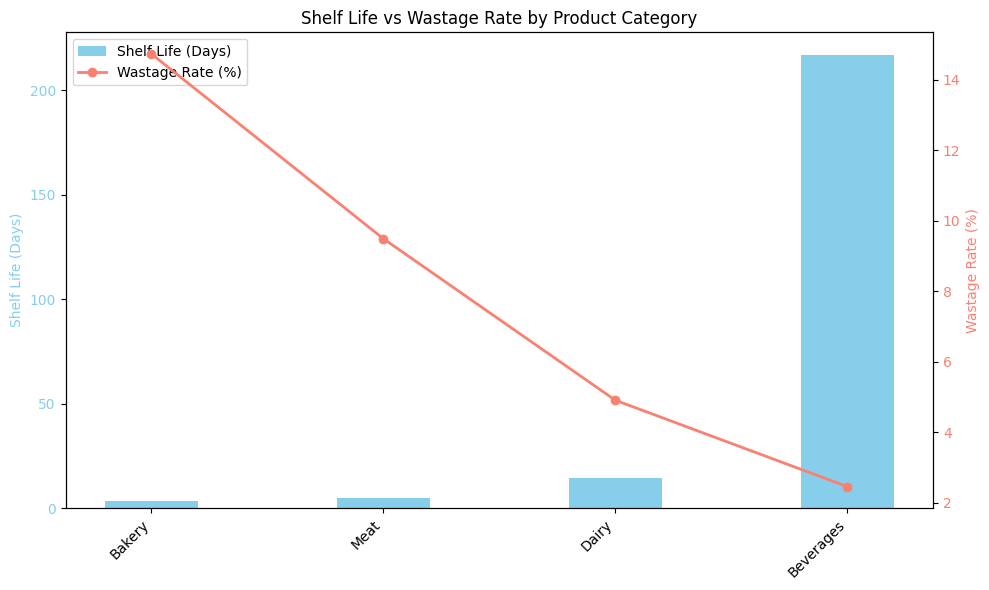

In [118]:
# --- 1️ Aggregate shelf life and wastage by category ---
shelf_life_impact = (
    pdt_info.groupby('Product_Category')
    .agg({
        'Shelf_Life_Days': 'mean',
        'Wastage_Units': 'sum',
        'Units_Sold': 'sum'
    })
    .reset_index()
)

# --- 2️ Compute wastage rate (%) ---
shelf_life_impact['Wastage_Rate_%'] = (
    shelf_life_impact['Wastage_Units'] / shelf_life_impact['Units_Sold'] * 100
).round(2)

# --- 3️ Identify key categories ---
shortest_shelf_life_cat = shelf_life_impact.loc[shelf_life_impact['Shelf_Life_Days'].idxmin(), 'Product_Category']
longest_shelf_life_cat = shelf_life_impact.loc[shelf_life_impact['Shelf_Life_Days'].idxmax(), 'Product_Category']
highest_wastage_cat = shelf_life_impact.loc[shelf_life_impact['Wastage_Rate_%'].idxmax(), 'Product_Category']

print(f" Category with shortest shelf life: {shortest_shelf_life_cat}")
print(f" Category with longest shelf life: {longest_shelf_life_cat}")
print(f" Category with highest wastage (linked to shelf life): {highest_wastage_cat}")

# --- 4️ Correlation between shelf life and wastage ---
corr = shelf_life_impact['Shelf_Life_Days'].corr(shelf_life_impact['Wastage_Rate_%'])
print(f" Correlation between shelf life and wastage rate: {corr:.2f}")



# Sort by shelf life for readability
shelf_life_impact = shelf_life_impact.sort_values('Shelf_Life_Days', ascending=True)

# --- Dual-axis plot ---
fig, ax1 = plt.subplots(figsize=(10,6))
x = np.arange(len(shelf_life_impact['Product_Category']))

# Left axis → Shelf life
ax1.bar(x, shelf_life_impact['Shelf_Life_Days'], color='skyblue', width=0.4, label='Shelf Life (Days)')
ax1.set_ylabel('Shelf Life (Days)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Right axis → Wastage rate
ax2 = ax1.twinx()
ax2.plot(x, shelf_life_impact['Wastage_Rate_%'], color='salmon', marker='o', linewidth=2, label='Wastage Rate (%)')
ax2.set_ylabel('Wastage Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# X-axis labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(shelf_life_impact['Product_Category'], rotation=45, ha='right')
plt.title('Shelf Life vs Wastage Rate by Product Category')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

#### Store Efficiency Analysis

In [119]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


 Best performing store (highest units sold): Store 500
 Lowest wastage store: Store 502
 Most efficient store (high revenue per wastage unit): Store 510


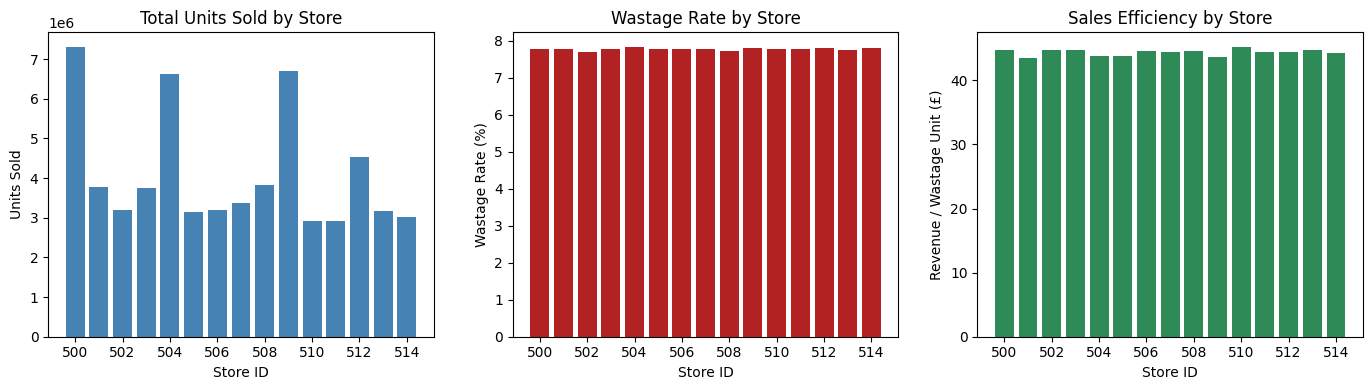

In [121]:
# --- 1️ Aggregate performance per store ---
store_efficiency = (
    pdt_info.groupby('Store_ID')
    .agg({
        'Units_Sold': 'sum',
        'Sales_Revenue(£)': 'sum',
        'Wastage_Units': 'sum'
    })
    .reset_index()
)

# --- 2️ Derived efficiency metrics ---
store_efficiency['Wastage_Rate_%'] = (
    store_efficiency['Wastage_Units'] / store_efficiency['Units_Sold'] * 100
).round(2)

store_efficiency['Revenue_per_Unit'] = (
    store_efficiency['Sales_Revenue(£)'] / store_efficiency['Units_Sold']
).round(2)

store_efficiency['Sales_Efficiency'] = (
    store_efficiency['Sales_Revenue(£)'] / (store_efficiency['Wastage_Units'] + 1)
).round(2)  # +1 avoids division by zero

# --- 3️ Identify key stores ---
best_store = store_efficiency.loc[store_efficiency['Units_Sold'].idxmax(), 'Store_ID']
lowest_wastage_store = store_efficiency.loc[store_efficiency['Wastage_Rate_%'].idxmin(), 'Store_ID']
most_efficient_store = store_efficiency.loc[store_efficiency['Sales_Efficiency'].idxmax(), 'Store_ID']

print(f" Best performing store (highest units sold): Store {best_store}")
print(f" Lowest wastage store: Store {lowest_wastage_store}")
print(f" Most efficient store (high revenue per wastage unit): Store {most_efficient_store}")

# --- 4️ Visual overview ---
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

# a) Units sold
ax[0].bar(store_efficiency['Store_ID'], store_efficiency['Units_Sold'], color='steelblue')
ax[0].set_title('Total Units Sold by Store')
ax[0].set_xlabel('Store ID'); ax[0].set_ylabel('Units Sold')

# b) Wastage rate
ax[1].bar(store_efficiency['Store_ID'], store_efficiency['Wastage_Rate_%'], color='firebrick')
ax[1].set_title('Wastage Rate by Store')
ax[1].set_xlabel('Store ID'); ax[1].set_ylabel('Wastage Rate (%)')

# c) Efficiency (revenue per wastage unit)
ax[2].bar(store_efficiency['Store_ID'], store_efficiency['Sales_Efficiency'], color='seagreen')
ax[2].set_title('Sales Efficiency by Store')
ax[2].set_xlabel('Store ID'); ax[2].set_ylabel('Revenue / Wastage Unit (£)')

plt.tight_layout()
plt.show()